In [1]:
# EDA
    
    # Missing B measurements
    # Satellite movements across sectors leads to very discontinuous data in sectors

# Feature Selection
    
    # Obtain datetime
    # Data split by satellite which took measurement
    
# Feature Engineering
    
    # Mean sampling daily
    # Filling missing values with interpolation
    # Scaling B
    # Apply timesteps to create dataset

# Model Training
    
    # LSTM

# Hyperparameter optimization

    # 1. Number of Epochs
    # 2. Batch Size
    # 3. Number of Neurons
    # 4. Dropout
    # 5. Layers
    # 6. Regularization
    # 7. Optimization Algorithm
    # 8. Loss Function
    # 9. Time Steps

In [2]:
# Load data

import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)
df.head()

In [9]:
#Adding column names to dataframe
df.columns = ['year', 'month', 'day', 'hour', 'minute', 
              'L', 'MLT', 'MLAT', 'AL Index', 
              'KP Index', 'Satellite Flag', 'B']

df.head()

,year,month,day,hour,minute,L,MLT,MLAT,AL Index,KP Index,Satellite Flag,B
0,2010,6,1,10,51,9.13,22.69,-1.43,-92,1,0.0,0.000765
1,2010,6,1,10,52,9.03,22.7,-1.44,-94,1,0.0,0.000699
2,2010,6,1,10,53,9.02,22.7,-1.45,-95,1,0.0,0.000786
3,2010,6,1,10,54,9.06,22.71,-1.46,-93,1,0.0,0.000748
4,2010,6,1,10,55,8.95,22.72,-1.48,-96,1,0.0,0.000933


In [10]:
# Converting year + month + day + hour + minute + second to datetime
datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Adding datetime column to dataframe
df.insert(0, "datetime", datetime, True)

df.head()

,datetime,year,month,day,hour,minute,L,MLT,MLAT,AL Index,KP Index,Satellite Flag,B
0,2010-06-01 10:51:00,2010,6,1,10,51,9.13,22.69,-1.43,-92,1,0.0,0.000765
1,2010-06-01 10:52:00,2010,6,1,10,52,9.03,22.7,-1.44,-94,1,0.0,0.000699
2,2010-06-01 10:53:00,2010,6,1,10,53,9.02,22.7,-1.45,-95,1,0.0,0.000786
3,2010-06-01 10:54:00,2010,6,1,10,54,9.06,22.71,-1.46,-93,1,0.0,0.000748
4,2010-06-01 10:55:00,2010,6,1,10,55,8.95,22.72,-1.48,-96,1,0.0,0.000933


In [15]:
df.shape[0]

1659514

In [11]:
# Dropping useless columns
df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index'], axis=1)

df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [12]:
# saving the dataframe 
df.to_csv('../data/processed/df_with_datetime.csv', index=False)
df = pd.read_csv('../data/processed/df_with_datetime.csv')
df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [14]:
df.shape[0]

1659514

In [16]:
# Checking if Satellite flag data is valid
df['Satellite Flag'].value_counts()

0.000000    482881
1.000000    461864
2.000000    459017
0.001010      2519
0.001040      2455
             ...  
0.201000         1
0.092600         1
0.236000         1
0.000587         1
0.097700         1
Name: Satellite Flag, Length: 2334, dtype: int64

In [17]:
# Converting satellite flag values to int
df['Satellite Flag'] = df['Satellite Flag'].astype(int)
df['Satellite Flag'].value_counts()

0    738633
1    461864
2    459017
Name: Satellite Flag, dtype: int64

In [20]:
# Splitting data into 3 frames for each satellite
# For satellite 0

df_ = df.loc[(df['Satellite Flag'] == 0)]
df_.to_csv('../data/processed/df_sat0.csv', index=False)
df_ = pd.read_csv('../data/processed/df_sat0.csv')
df_['Satellite Flag'].value_counts()

0    738633
Name: Satellite Flag, dtype: int64

In [21]:
# For satellite 1

df_ = df.loc[(df['Satellite Flag'] == 1)]
df_.to_csv('../data/processed/df_sat1.csv', index=False)
df_ = pd.read_csv('../data/processed/df_sat1.csv')
df_['Satellite Flag'].value_counts()

1    461864
Name: Satellite Flag, dtype: int64

In [22]:
# For satellite 2

df_ = df.loc[(df['Satellite Flag'] == 2)]
df_.to_csv('../data/processed/df_sat2.csv', index=False)
df_ = pd.read_csv('../data/processed/df_sat2.csv')
df_['Satellite Flag'].value_counts()

2    459017
Name: Satellite Flag, dtype: int64

In [36]:
# Select a satellite

df = pd.read_csv('../data/processed/df_sat0.csv')
df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0,0.000933


In [38]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime          datetime64[ns]
L                        float64
MLT                       object
MLAT                     float64
Satellite Flag             int64
B                        float64
dtype: object

In [39]:
df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0,0.000933


In [40]:
# Sort by datetime
df = df.sort_values(by = 'datetime')
df.shape

(738633, 6)

In [41]:
# Setting index on datetime
df = df.set_index('datetime')
df.head()

,L,MLT,MLAT,Satellite Flag,B
datetime,,,,,
2010-06-01 10:51:00,9.13,22.69,-1.43,0,0.000765
2010-06-01 10:52:00,9.03,22.7,-1.44,0,0.000699
2010-06-01 10:53:00,9.02,22.7,-1.45,0,0.000786
2010-06-01 10:54:00,9.06,22.71,-1.46,0,0.000748
2010-06-01 10:55:00,8.95,22.72,-1.48,0,0.000933


In [44]:
# Taking average of every day
df_sampled = df.resample('1440Min').mean()

In [46]:
df_sampled.shape

(2830, 4)

In [47]:
df_sampled.head()

,L,MLAT,Satellite Flag,B
datetime,,,,
2010-06-01,6.561608,-1.397487,0.0,0.001997
2010-06-02,6.689676,-1.489676,0.0,0.001322
2010-06-03,6.329808,-1.194904,0.0,0.021389
2010-06-04,6.381292,-1.186986,0.0,0.010071
2010-06-05,6.478571,-1.288878,0.0,0.001085


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

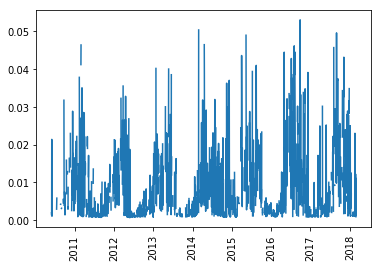

In [48]:
# Plotting to visualize extent of missing data
plt.plot(df_sampled['B'])
plt.xticks(rotation='vertical')

In [52]:
# Interpolate missing data using InterpolateSLinear
df_sampled = df_sampled.assign(InterpolateSLinear = df_sampled['B'].interpolate(method='slinear'))

(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

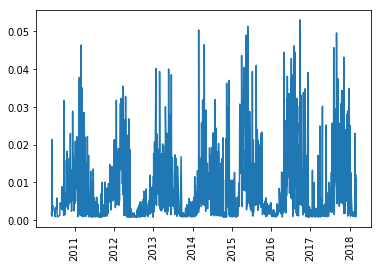

In [54]:
# Plotting to visualize with filled data
plt.plot(df_sampled['InterpolateSLinear'])
plt.xticks(rotation='vertical')

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
scaler = MinMaxScaler(feature_range=(0,1))

#The reshape converts the row of values into array with several rows with 1 value each
B = scaler.fit_transform(np.array(df_sampled['InterpolateSLinear']).reshape(-1,1))

In [56]:
#Train test split
training_size = 0.7
training_row_limit = int(training_size*B.shape[0])
sections = np.split(B, indices_or_sections = [training_row_limit], axis = 0)
train = sections[0]
test = sections[1]

In [57]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [58]:
# HyperParameters
# Timesteps is how many previous observations we are dependent on
time_step = 100

# Creating training and testing datasets
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [59]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [110]:
X_train_reshaped.shape

(1879, 100, 1)

In [60]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.save('../models/Model_1')

In [63]:
model.fit(X_train_reshaped,y_train,validation_data=(X_test_reshaped,ytest),epochs=100,batch_size=64,verbose=1)

Train on 1879 samples, validate on 749 samples
Epoch 1/100
1879/1879 [==============================] - 11s 6ms/step - loss: 0.0184 - val_loss: 0.0249
Epoch 2/100
1879/1879 [==============================] - 8s 4ms/step - loss: 0.0162 - val_loss: 0.0249
Epoch 3/100
1879/1879 [==============================] - 8s 4ms/step - loss: 0.0161 - val_loss: 0.0246
Epoch 4/100
1879/1879 [==============================] - 9s 5ms/step - loss: 0.0161 - val_loss: 0.0266
Epoch 5/100
1879/1879 [==============================] - 9s 5ms/step - loss: 0.0166 - val_loss: 0.0243
Epoch 6/100
1879/1879 [==============================] - 10s 5ms/step - loss: 0.0157 - val_loss: 0.0240
Epoch 7/100
1879/1879 [==============================] - 10s 5ms/step - loss: 0.0153 - val_loss: 0.0245
Epoch 8/100
1879/1879 [==============================] - 10s 5ms/step - loss: 0.0152 - val_loss: 0.0233
Epoch 9/100
1879/1879 [==============================] - 10s 5ms/step - loss: 0.0148 - val_loss: 0.0226
Epoch 10/100
1879/187

1879/1879 [==============================] - 13s 7ms/step - loss: 0.0110 - val_loss: 0.0185
Epoch 79/100
1879/1879 [==============================] - 13s 7ms/step - loss: 0.0110 - val_loss: 0.0186
Epoch 80/100
1879/1879 [==============================] - 13s 7ms/step - loss: 0.0110 - val_loss: 0.0186
Epoch 81/100
1879/1879 [==============================] - 12s 7ms/step - loss: 0.0110 - val_loss: 0.0187
Epoch 82/100
1879/1879 [==============================] - 13s 7ms/step - loss: 0.0111 - val_loss: 0.0186
Epoch 83/100
1879/1879 [==============================] - 13s 7ms/step - loss: 0.0111 - val_loss: 0.0186
Epoch 84/100
1879/1879 [==============================] - 12s 7ms/step - loss: 0.0110 - val_loss: 0.0185
Epoch 85/100
1879/1879 [==============================] - 13s 7ms/step - loss: 0.0110 - val_loss: 0.0188
Epoch 86/100
1879/1879 [==============================] - 13s 7ms/step - loss: 0.0111 - val_loss: 0.0186
Epoch 87/100
1879/1879 [==============================] - 12s 7ms/st

In [64]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train_reshaped)
test_predict=model.predict(X_test_reshaped)

In [65]:
##Transformback to original form, reverse the effect of scaling
train_predict_unscaled = scaler.inverse_transform(train_predict)
test_predict_unscaled = scaler.inverse_transform(test_predict)
y_train_unscaled = scaler.inverse_transform(np.array(y_train).reshape(-1,1))
ytest_unscaled = scaler.inverse_transform(np.array(ytest).reshape(-1,1))

In [66]:
### Calculate RMSE performance metrics. RMSE on training data gives a benchmark to compare against.
import math
from sklearn.metrics import mean_squared_error
training_RMSE = math.sqrt(mean_squared_error(y_train_unscaled, train_predict_unscaled))
print("Training data RMSE: ", training_RMSE)

### Test Data RMSE
test_RMSE = math.sqrt(mean_squared_error(ytest_unscaled, test_predict_unscaled))
print("Testing data RMSE: ", test_RMSE)

Training data RMSE:  0.005429031450293193
Testing data RMSE:  0.0070887288934131385


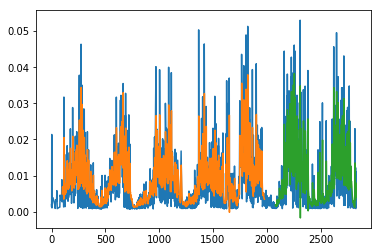

In [70]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(B)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_unscaled)+look_back, :] = train_predict_unscaled

# shift test predictions for plotting
testPredictPlot = np.empty_like(B)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_unscaled)+(look_back*2)+1:len(B)-1, :] = test_predict_unscaled

# plot baseline and predictions
plt.plot(scaler.inverse_transform(B))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [82]:
len(test)

850

In [99]:
from numpy import array

In [101]:
future_days = 365 #Number of days we are predicting data for
prev_days=100 #Number of previous days worth of data we are utilising

In [104]:
test.shape

(850, 1)

In [120]:
# Create a list of latest 100 observations

lst = test[len(test) - prev_days -1:len(test)-1]
lst.shape

(100, 1)

In [121]:
lst = lst.reshape(lst.shape[1],lst.shape[0] , 1)
lst.shape

(1, 100, 1)

In [126]:
print(lst)

[[[0.02051281]
  [0.44430245]
  [0.31406489]
  [0.28703057]
  [0.25999625]
  [0.21387811]
  [0.18400021]
  [0.1541223 ]
  [0.12424439]
  [0.09436648]
  [0.08305175]
  [0.10660856]
  [0.24456701]
  [0.38252545]
  [0.5204839 ]
  [0.12348471]
  [0.4710484 ]
  [0.15340277]
  [0.14816951]
  [0.14293625]
  [0.13770299]
  [0.38447356]
  [0.53893629]
  [0.13679463]
  [0.23788004]
  [0.00765655]
  [0.01239302]
  [0.02458646]
  [0.0367799 ]
  [0.04897334]
  [0.51866098]
  [0.06907976]
  [0.0180782 ]
  [0.08680888]
  [0.33815904]
  [0.58950921]
  [0.52738244]
  [0.65220941]
  [0.3577875 ]
  [0.0633656 ]
  [0.09282579]
  [0.12228598]
  [0.19216492]
  [0.34820604]
  [0.16399946]
  [0.05986052]
  [0.46449172]
  [0.21650231]
  [0.00629959]
  [0.00836766]
  [0.18555386]
  [0.22708537]
  [0.0578154 ]
  [0.0550544 ]
  [0.05229339]
  [0.04953238]
  [0.11910421]
  [0.10827156]
  [0.09743891]
  [0.08660626]
  [0.07577361]
  [0.05572646]
  [0.03567931]
  [0.01563216]
  [0.01397825]
  [0.01232433]
  [0.01067

In [141]:
forecast = []

for day in range(future_days):
    print("Day : ",day)
    y = model.predict(lst)
    print("Prediction : ",y)
    forecast.append(y[0][0])
    lst = lst[:,1:100,:]
    lst = np.append(lst, [y], axis = 1)

Day :  0
Prediction :  [[0.06152214]]
Day :  1
Prediction :  [[0.07648171]]
Day :  2
Prediction :  [[0.08487283]]
Day :  3
Prediction :  [[0.09087902]]
Day :  4
Prediction :  [[0.09554332]]
Day :  5
Prediction :  [[0.09946035]]
Day :  6
Prediction :  [[0.10299811]]
Day :  7
Prediction :  [[0.10637248]]
Day :  8
Prediction :  [[0.10970639]]
Day :  9
Prediction :  [[0.11305846]]
Day :  10
Prediction :  [[0.11644469]]
Day :  11
Prediction :  [[0.11984934]]
Day :  12
Prediction :  [[0.12323597]]
Day :  13
Prediction :  [[0.12653674]]
Day :  14
Prediction :  [[0.12971155]]
Day :  15
Prediction :  [[0.13274589]]
Day :  16
Prediction :  [[0.13573876]]
Day :  17
Prediction :  [[0.13857743]]
Day :  18
Prediction :  [[0.14134407]]
Day :  19
Prediction :  [[0.14401771]]
Day :  20
Prediction :  [[0.14659885]]
Day :  21
Prediction :  [[0.14909422]]
Day :  22
Prediction :  [[0.1514543]]
Day :  23
Prediction :  [[0.15369228]]
Day :  24
Prediction :  [[0.15594065]]
Day :  25
Prediction :  [[0.15815958

Prediction :  [[0.25887525]]
Day :  211
Prediction :  [[0.2588839]]
Day :  212
Prediction :  [[0.2588922]]
Day :  213
Prediction :  [[0.25890028]]
Day :  214
Prediction :  [[0.25890818]]
Day :  215
Prediction :  [[0.25891578]]
Day :  216
Prediction :  [[0.2589231]]
Day :  217
Prediction :  [[0.25893027]]
Day :  218
Prediction :  [[0.2589372]]
Day :  219
Prediction :  [[0.25894395]]
Day :  220
Prediction :  [[0.25895047]]
Day :  221
Prediction :  [[0.2589568]]
Day :  222
Prediction :  [[0.25896293]]
Day :  223
Prediction :  [[0.25896883]]
Day :  224
Prediction :  [[0.2589745]]
Day :  225
Prediction :  [[0.2589801]]
Day :  226
Prediction :  [[0.25898546]]
Day :  227
Prediction :  [[0.25899068]]
Day :  228
Prediction :  [[0.25899574]]
Day :  229
Prediction :  [[0.25900063]]
Day :  230
Prediction :  [[0.25900537]]
Day :  231
Prediction :  [[0.25900993]]
Day :  232
Prediction :  [[0.25901434]]
Day :  233
Prediction :  [[0.25901863]]
Day :  234
Prediction :  [[0.2590228]]
Day :  235
Predicti

In [155]:
forecast_ = np.array(forecast)
forecast_.shape
forecast_ = forecast_.reshape(forecast_.shape[0],1)
forecast_.shape

(365, 1)

In [163]:
B.shape

(2830, 1)

In [165]:
new_B = np.append(B, forecast_)
new_B = new_B.reshape(new_B.shape[0], 1)
new_B.shape

(3195, 1)

In [157]:
trainPredictPlot.shape

(2830, 1)

In [158]:
testPredictPlot.shape

(2830, 1)

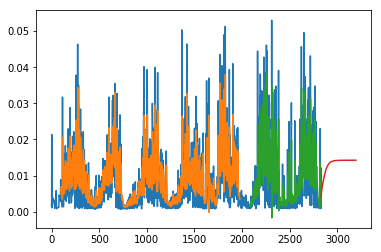

In [169]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(new_B)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_unscaled)+look_back, :] = train_predict_unscaled

# shift test predictions for plotting
testPredictPlot = np.empty_like(new_B)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_unscaled)+(look_back*2)+1:len(B)-1, :] = test_predict_unscaled

# shift forecast for plotting
forecastPlot = np.empty_like(new_B)
forecastPlot[:, :] = np.nan
forecastPlot[len(B):len(new_B), :] = forecast_

# plot baseline and predictions and forecast
plt.plot(scaler.inverse_transform(B))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(scaler.inverse_transform(forecastPlot))
plt.show()